<a href="https://colab.research.google.com/github/tarangga/ClassDiagramPPL/blob/main/Tugas_2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

from random import random, shuffle
from math import exp

# Load images

In [ ]:
base_dir = '/content/gdrive/Shareddrives/Tugas ML_MLP/flowers'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Directory untuk daisy images (train)
train_daisy_dir = os.path.join(train_dir, 'daisy')

# Directory untuk dandelion images (train)
train_dandelion_dir = os.path.join(train_dir, 'dandelion')

# Directory untuk sunflower images (train)
train_sunflower_dir = os.path.join(train_dir, 'sunflower')

# Directory untuk daisy images (test)
test_daisy_dir = os.path.join(test_dir, 'daisy')

# Directory untuk dandelion images (test)
test_dandelion_dir = os.path.join(test_dir, 'dandelion')

# Directory untuk sunflower images (test)
test_sunflower_dir = os.path.join(test_dir, 'sunflower')

In [ ]:
print('jumlah train images: ', len(os.listdir(train_daisy_dir)) + len(os.listdir(train_dandelion_dir)) + len(os.listdir(train_sunflower_dir)))
print('jumlah test images: ', len(os.listdir(test_daisy_dir)) + len(os.listdir(test_dandelion_dir)) + len(os.listdir(test_sunflower_dir)))

jumlah train images:  240
jumlah test images:  60


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
train_daisy_fnames = os.listdir(train_daisy_dir)
train_dandelion_fnames = os.listdir(train_dandelion_dir)
train_sunflower_fnames = os.listdir(train_sunflower_dir)

test_daisy_fnames = os.listdir(test_daisy_dir)
test_dandelion_fnames = os.listdir(test_dandelion_dir)
test_sunflower_fnames = os.listdir(test_sunflower_dir)

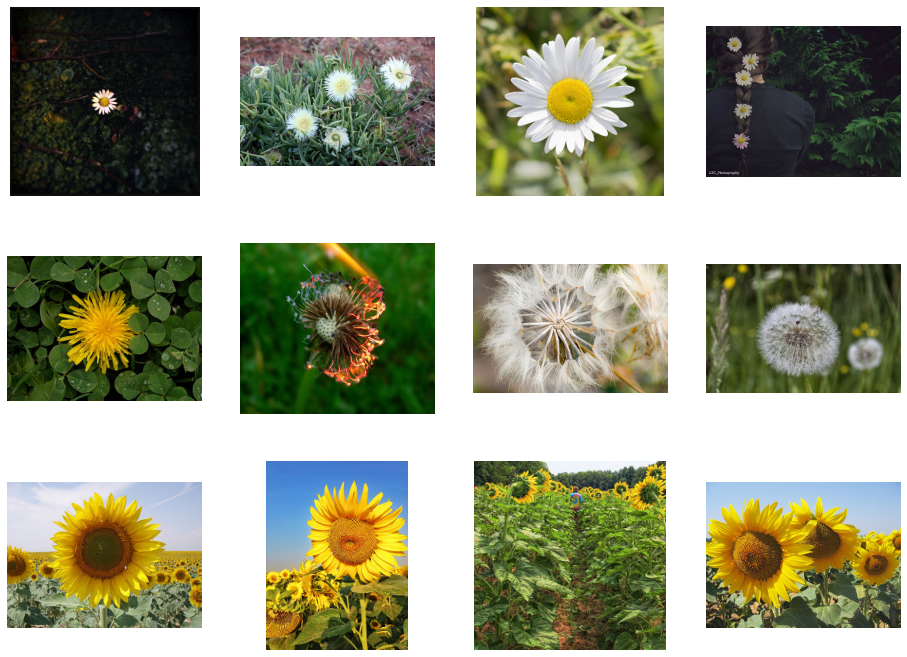

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

pic_index=4

next_daisy_pix = [os.path.join(train_daisy_dir, fname) 
                for fname in train_daisy_fnames[0:pic_index] 
               ]

next_dandelion_pix = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_fnames[0:pic_index]
               ]

next_sunflower_pix = [os.path.join(train_sunflower_dir, fname) 
                for fname in train_sunflower_fnames[0:pic_index]
               ]

for i, img_path in enumerate(next_daisy_pix+next_dandelion_pix+next_sunflower_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Resize and Convert to Grayscale

In [ ]:
import cv2
resize_dim = (320,240)

In [ ]:
def resize (dir, fnames):
  next_to_resize = [os.path.join(dir, fname) for fname in fnames]
  img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in next_to_resize]

  resized_flower = []

  for i in range(len(img)):
    # Resize to 320x240
    res = cv2.resize(img[i], resize_dim, interpolation=cv2.INTER_LINEAR)

    # Convert to grayscale
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
    
    resized_flower.append(gray)
  
  img_size_before = cv2.imread(os.path.join(dir, fnames[1]))

  print("Ambil sampel image[1] untuk cek hasil resize")
  print("--------------------------------------------")
  print("Lebar sebelum: ", img_size_before.shape[1], ", tinggi sebelum: ", img_size_before.shape[0])
  print("Lebar sesudah: ", resized_flower[1].shape[1], ", tinggi sesudah: ", resized_flower[1].shape[0])
  
  return resized_flower

In [ ]:
resized_train_daisy = resize(train_daisy_dir, train_daisy_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  500 , tinggi sebelum:  333
Lebar sesudah:  320 , tinggi sesudah:  240


In [ ]:
resized_train_dandelion = resize(train_dandelion_dir, train_dandelion_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  320 , tinggi sebelum:  283
Lebar sesudah:  320 , tinggi sesudah:  240


In [ ]:
resized_train_sunflower = resize(train_sunflower_dir, train_sunflower_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  180 , tinggi sebelum:  240
Lebar sesudah:  320 , tinggi sesudah:  240


In [ ]:
resized_test_daisy = resize(test_daisy_dir, test_daisy_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  320 , tinggi sebelum:  240
Lebar sesudah:  320 , tinggi sesudah:  240


In [ ]:
resized_test_dandelion = resize(test_dandelion_dir, test_dandelion_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  320 , tinggi sebelum:  228
Lebar sesudah:  320 , tinggi sesudah:  240


In [ ]:
resized_test_sunflower = resize(test_sunflower_dir, test_sunflower_fnames)

Ambil sampel image[1] untuk cek hasil resize
--------------------------------------------
Lebar sebelum:  180 , tinggi sebelum:  240
Lebar sesudah:  320 , tinggi sesudah:  240


In [ ]:
def display(imgs):
  fig = plt.gcf()
  fig.set_size_inches(16, 16)
  
  for i in range(4):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(1, 4, i + 1)
    sp.axis('Off')
    
    # For displaying a grayscale image, set up the colormapping 
    plt.imshow(imgs[i], cmap='gray')

  plt.show()

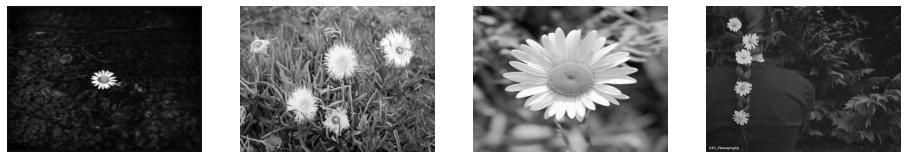

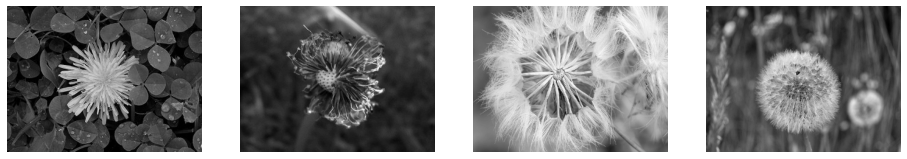

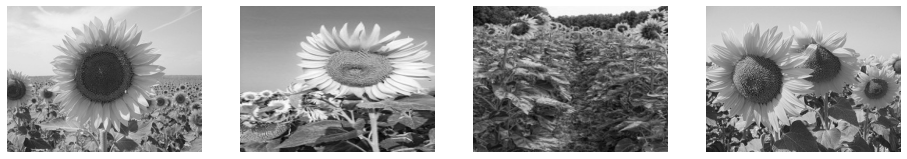

In [ ]:
display(resized_train_daisy)
display(resized_train_dandelion)
display(resized_train_sunflower)

In [ ]:
# Normalize to range [0, 1]

def normalize(px):
  px = px.astype('float32')
  px /= 255.0

  return px

### Normalisasi nilai piksel ke range [0, 1]

In [ ]:
normalized_train_daisy = [normalize(resized_train_daisy[i]) for i in range(len(resized_train_daisy))]
print("Check Normalization Train Daisy. Jumlah data:", len(normalized_train_daisy))
print(normalized_train_daisy[0])

normalized_train_dandelion = [normalize(resized_train_dandelion[i]) for i in range(len(resized_train_dandelion))]
normalized_train_sunflower = [normalize(resized_train_sunflower[i]) for i in range(len(resized_train_sunflower))]
normalized_test_daisy = [normalize(resized_test_daisy[i]) for i in range(len(resized_test_daisy))]
normalized_test_dandelion = [normalize(resized_test_dandelion[i]) for i in range(len(resized_test_dandelion))]
normalized_test_sunflower = [normalize(resized_test_sunflower[i]) for i in range(len(resized_test_sunflower))]

Check Normalization Train Daisy. Jumlah data: 80
[[0.05490196 0.05490196 0.05490196 ... 0.05490196 0.05882353 0.06666667]
 [0.05490196 0.05098039 0.05098039 ... 0.05098039 0.05098039 0.05490196]
 [0.05098039 0.04705882 0.04705882 ... 0.04313726 0.04705882 0.05098039]
 ...
 [0.05490196 0.05490196 0.05490196 ... 0.04705882 0.04705882 0.05098039]
 [0.05490196 0.05882353 0.05882353 ... 0.05098039 0.05098039 0.05490196]
 [0.05490196 0.05882353 0.05882353 ... 0.05490196 0.05882353 0.0627451 ]]


# Algoritma Backpropagation

### Aktivasi Sigmoid

In [ ]:
import numpy as np

In [ ]:
def activation(z):
  return 1 / (1 + np.exp(-z))

### Flatten

In [ ]:
def flatten(data):
  res = []
  for row in data:
    for col in row:
      res.append(col)

  return res

def flatten_dataset(dataset):
  new_dataset = []
  for data in dataset:
    new_dataset.append(flatten(data))
  return new_dataset

flatten_dataset([[
         [255, 123, 100],
         [21, 22, 33],
         [21, 44, 22]
],[
   [1, 2, 3],
   [10, 30, 25],
   [1, 0, 23]
]])

[[255, 123, 100, 21, 22, 33, 21, 44, 22], [1, 2, 3, 10, 30, 25, 1, 0, 23]]

In [ ]:
flat_train_daisy = flatten_dataset(normalized_train_daisy)
flat_train_dandelion = flatten_dataset(normalized_train_dandelion)
flat_train_sunflower = flatten_dataset(normalized_train_sunflower)
flat_test_daisy = flatten_dataset(normalized_test_daisy)
flat_test_dandelion = flatten_dataset(normalized_test_dandelion)
flat_test_sunflower = flatten_dataset(normalized_test_sunflower)

In [ ]:
label_train_daisy = [0 for i in range(len(flat_train_daisy))]
label_train_dandelion = [1 for i in range(len(flat_train_dandelion))]
label_train_sunflower = [2 for i in range(len(flat_train_sunflower))]
label_test_daisy = [0 for i in range(len(flat_test_daisy))]
label_test_dandelion = [1 for i in range(len(flat_test_dandelion))]
label_test_sunflower = [2 for i in range(len(flat_test_sunflower))]

In [ ]:
x = list(range(1, 10))
shuffle(x)
x

[1, 6, 8, 3, 9, 2, 4, 5, 7]

In [ ]:
def shuffle_data(train, label):
  train_dataset = []
  label_dataset = []

  for t in train:
    train_dataset = train_dataset + t
  
  for l in label:
    label_dataset = label_dataset + l
  ind = list(range(len(train_dataset)))
  shuffle(ind)
  return [train_dataset[i] for i in ind], [label_dataset[i] for i in ind]

train, label_train = shuffle_data(
    [flat_train_daisy, flat_train_dandelion, flat_train_sunflower],
    [label_train_daisy, label_train_dandelion, label_train_sunflower]
)

test, label_test = shuffle_data(
    [flat_test_daisy, flat_test_dandelion, flat_test_sunflower],
    [label_test_daisy, label_test_dandelion, label_test_sunflower]
)

### Inisialisasi bobot and bias

In [ ]:
def init_weight(input_dim, hidden_dim, output_dim):
  weights = []
  
  input_to_hidden = [{'weight': [random() for j in range(input_dim + 1)]} for i in range(hidden_dim)]
  hidden_to_output = [{'weight': [random() for j in range(hidden_dim + 1)]} for i in range(output_dim)]
  
  weights.append(input_to_hidden)
  weights.append(hidden_to_output)
  
  return weights

init_weight(10, 2, 3)

[[{'weight': [0.5582528260487597,
    0.9517060897999532,
    0.9500015258670638,
    0.8862349618322112,
    0.5679497446027446,
    0.21829130761264892,
    0.8231472124953914,
    0.6783578132489927,
    0.6220821727662355,
    0.11101079664334568,
    0.9927851399730264]},
  {'weight': [0.007849826364655366,
    0.07866162025578016,
    0.6535360711670978,
    0.35453962488591384,
    0.6910189583483302,
    0.9844388341893481,
    0.1838880734054773,
    0.35526561799151035,
    0.3306169113730596,
    0.9432208555085689,
    0.17783970003239713]}],
 [{'weight': [0.039753889104955586, 0.8607639288613962, 0.4258791587600119]},
  {'weight': [0.8445793548544474, 0.09685915406078394, 0.15906639237154496]},
  {'weight': [0.4328817614569026, 0.10775936848639078, 0.12760297421775346]}]]

### Menghitung error

In [ ]:
def error(target, prediction):
  error = 1/2*(prediction - target)**2
  return error

### Feedforward

In [ ]:
def neuron_calc(weights, neurons):
  res = weights[-1]
  for i in range(len(weights)-1):
    res += weights[i] * neurons[i]
  return res

In [ ]:
def feedforward(network, pixels):
  neurons = pixels

  for layer in network:
    next_inputs = []

    for neuron in layer:
      res = neuron_calc(neuron['weight'], neurons)
      neuron['output'] = activation(res)
      next_inputs.append(neuron['output'])
    
    neurons = next_inputs
  
  return neurons

### Backward

In [ ]:
def backpropagation(network, target):
  net_len = len(network)
  for i in reversed(range(len(network))):
    layer = network[i]
    err = []
    if i == net_len - 1:
      err = err + [target[j] - layer[j]['output'] for j in range(len(layer))]
    else:
      for j in range(len(layer)):
        err.append(
            sum([
                 n['weight'][j]*n['delta'] for n in network[i+1]
            ])
        )
    for j in range(len(layer)):
      n = layer[j]
      n['delta'] = err[j]*n['output']*(1.0 - n['output'])


### Update Bobot

In [ ]:
def update_weight(network, neurons, learning_rate):
  for i in range(len(network)):
    inputs = neurons[:-1] if i==0 else [n['output'] for n in network[i-1]]
    for neuron in network[i]:
      for j in range(len(inputs)):
        neuron['weight'][j] = neuron['weight'][j] + learning_rate*neuron['delta']*inputs[j]
      neuron['weight'][-1] = neuron['weight'][-1] + learning_rate*neuron['delta']

### Prediksi

In [ ]:
def output_prediction(res_activation, threshold=0.5):    
  return [
          1.0 if res >= threshold else 0.0 for res in res_activation
  ]


### Training

In [ ]:
def softmax(Z):
  tot = 0.0
  for z in Z:
    tot = exp(z) + tot

  outputs = [
          z/tot for z in Z
  ]
  max_out = max(outputs)

  for i in range(len(outputs)):
    if outputs[i] == max_out:
      return i 

softmax([1, 2])

1

In [ ]:
def train_network(train_data, train_label, network, learning_rate, epochs, out): # apalagi ya belum kepikiran
  err_val = []
  acc_val = []
  for epoch in range(epochs):
    true_val = 0.0
    tot_err = 0.0
    exp = []
    pred = []
    for pos in range(len(train_data)):
      data = train_data[pos]
      outputs = feedforward(network, data)
      expected = [0.0 for i in range(out)]
      expected[train_label[pos]] = 1.0
      tot_err = tot_err + sum(
          [error(expected[i], outputs[i]) for i in range(len(expected))]
      )
      backpropagation(network, expected)
      update_weight(network, data, learning_rate)
      max_out = max(outputs)
      for id_pos in range(len(outputs)):
        out_val = outputs[id_pos]
        if max_out == out_val:
          idout = id_pos
      #print(expected, outputs)
      if idout == train_label[pos]:
        true_val = true_val + 1.0
      
    
    err_val.append(tot_err/len(train_data))
    print(true_val)
    acc_val.append(true_val/len(train_data))
    print(epoch, ')\t', 'error: ', err_val[-1], '\t; accuracy: ', acc_val[-1])
  return err_val, acc_val, network


In [ ]:
def test_network(test_data, test_label, network, learning_rate, epochs, out): # apalagi ya belum kepikiran
  err_val = []
  acc_val = []
  for epoch in range(epochs):
    true_val = 0.0
    tot_err = 0.0
    exp = []
    pred = []
    for pos in range(len(test_data)):
      data = test_data[pos]
      outputs = feedforward(network, data)
      expected = [0.0 for i in range(out)]
      expected[test_label[pos]] = 1.0
      tot_err = tot_err + sum(
          [error(expected[i], outputs[i]) for i in range(len(expected))]
      )
      backpropagation(network, expected)
      max_out = max(outputs)
      for id_pos in range(len(outputs)):
        out_val = outputs[id_pos]
        if max_out == out_val:
          idout = id_pos
      #print(expected, outputs)
      if idout == test_label[pos]:
        true_val = true_val + 1.0
      
    
    err_val.append(tot_err/len(test_data))
    print(true_val)
    acc_val.append(true_val/len(test_data))
    print(epoch, ')\t', 'error: ', err_val[-1], '\t; accuracy: ', acc_val[-1])
  return err_val, acc_val, network


# Eksperimen

In [ ]:
n_inputs = len(flat_train_daisy[0]) - 1

n_outputs = 3

network = init_weight(n_inputs, 5, n_outputs)
train_err, train_acc, network = train_network(train, label_train, network, 0.1, 50, n_outputs)


80.0
0 )	 error:  0.4620840075234565 	; accuracy:  0.3333333333333333
75.0
1 )	 error:  0.34025266842158713 	; accuracy:  0.3125
75.0
2 )	 error:  0.3402678862801321 	; accuracy:  0.3125
75.0
3 )	 error:  0.34026790301596527 	; accuracy:  0.3125
75.0
4 )	 error:  0.3402679030339971 	; accuracy:  0.3125
75.0
5 )	 error:  0.340267903034017 	; accuracy:  0.3125
75.0
6 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
7 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
8 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
9 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
10 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
11 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
12 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
13 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
14 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
15 )	 error:  0.34026790303401694 	; accuracy:  0.3125
75.0
16 )	 error:  0.34026790303401694 	; a

NameError: ignored

In [ ]:
train_err

[0.4620840075234565,
 0.34025266842158713,
 0.3402678862801321,
 0.34026790301596527,
 0.3402679030339971,
 0.340267903034017,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.34026790303401694,
 0.340267903034

In [ ]:
train_acc

[0.3333333333333333,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125,
 0.3125]

In [ ]:
test_err, test_acc, network = test_network(test, label_test, network, 0.1, 50, n_outputs)


20.0
0 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
1 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
2 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
3 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
4 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
5 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
6 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
7 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
8 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
9 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
10 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
11 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
12 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
13 )	 error:  0.3348933854742346 	; accuracy:  0.3333333333333333
20.0
14 )	 error

In [ ]:
n_inputs = len(flat_train_daisy[0]) - 1

n_outputs = 3

network2 = init_weight(n_inputs, 5, n_outputs)
train_err2, train_acc2, network2 = train_network(train, label_train, network2, 0.8, 50, n_outputs)
test_err2, test_acc2, network2 = test_network(test, label_test, network2, 0.8, 50, n_outputs)

73.0
0 )	 error:  0.42287236714876364 	; accuracy:  0.30416666666666664
72.0
1 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
2 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
3 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
4 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
5 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
6 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
7 )	 error:  0.3743813748345573 	; accuracy:  0.3
72.0
8 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
9 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
10 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
11 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
12 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
13 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
14 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
15 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
16 )	 error:  0.37438137483455736 	; accuracy:  0.3
72.0
17 )	 error:  0.37438

# Visualisasi error dan akurasi

### Grafik Akurasi

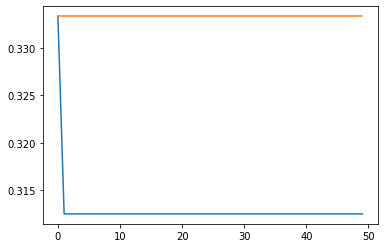

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(50)), train_acc, label='train')
plt.plot(list(range(50)), test_acc,  label='test')
plt.show()

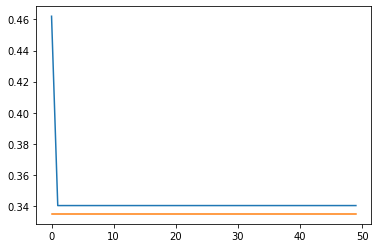

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(50)), train_err, label='train')
plt.plot(list(range(50)), test_err,  label='test')
plt.show()

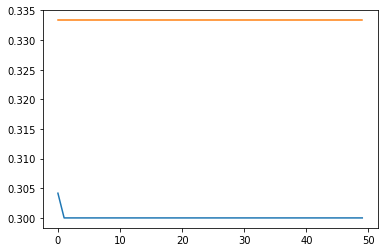

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(50)), train_acc2, label='train')
plt.plot(list(range(50)), test_acc2,  label='test')
plt.show()

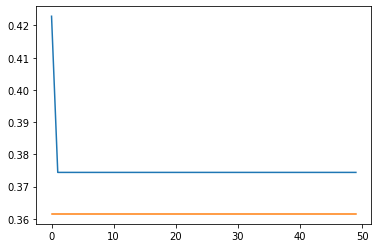

In [ ]:
import matplotlib.pyplot as plt

plt.plot(list(range(50)), train_err2, label='train')
plt.plot(list(range(50)), test_err2,  label='test')
plt.show()

In [ ]:
#grafik akurasi 
x=plt.figure()
plt.suptitle('Grafik Akurasi Learning Rate 0.05')
plt.xlabel('epoch')
plt.ylabel('accuracy')